# Plotting

Learn the basics of plotting with `pandas` for *preliminary* visual exploration of data.

## Dataset 1: glacial data

Let's start by importing the data:

In [1]:
import pandas as pd

# read in file
df = pd.read_csv('glacial_loss.csv')

# see the first five rows
df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


In [2]:
# print the colums
df.columns

Index(['year', 'europe', 'arctic', 'alaska', 'asia', 'north_america',
       'south_america', 'antarctica', 'global_glacial_volume_change',
       'annual_sea_level_rise', 'cumulative_sea_level_rise'],
      dtype='object')

# `plot()` method
`pandas.DataFrame` has a built-in method `plot()` for plotting. 
Default behavior of plot without specifying parameters:

- creates one line plot for each of the columns with numeric data
- sets the values of the index as the x-axis values

Example:

<AxesSubplot:>

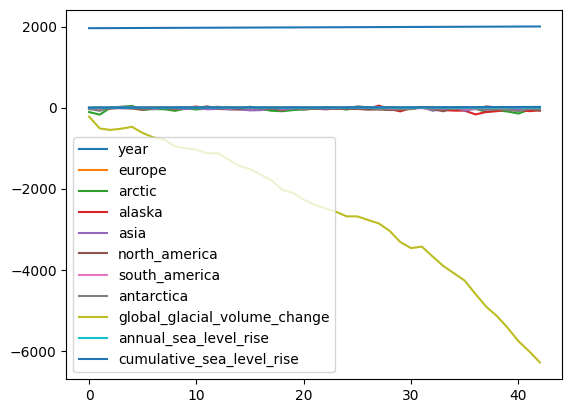

In [3]:
#  a mess
df.plot()

## Line plots

We can make a line plot of one column against another by using the following syntax:
```
df.plot(x='x_values_column', y='y_values_column')
```

Example:

<AxesSubplot:xlabel='year'>

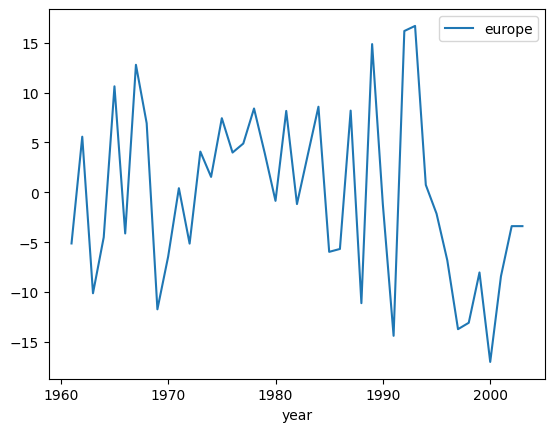

In [4]:
# change in glacial volume per year in Europe
df.plot(x='year', y='europe')

Bais customization specifying other arguments in `plot()`.

Example:

<AxesSubplot:title={'center':'Change in glacial volume per year in Europe'}, xlabel='Year', ylabel='Change in glacial volume (km3)'>

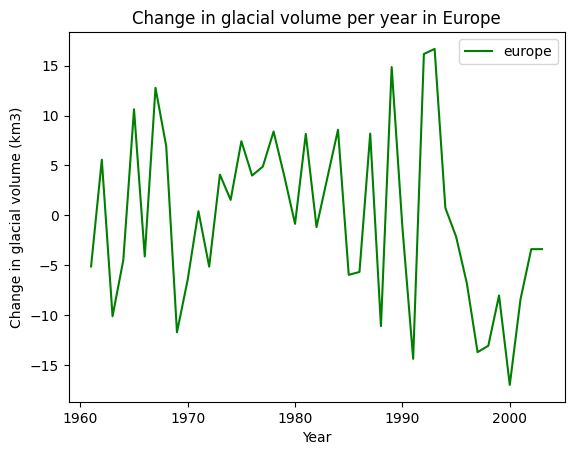

In [5]:
# change in glacial volume per year in Europe
df.plot(x='year', 
        y='europe',
        title='Change in glacial volume per year in Europe',
        xlabel='Year',
        ylabel='Change in glacial volume (km3)',
        color='green')

# Multiple line plots

We want to graph the change in glacial volume in the Arctic and Alaska. Update these arguments:

- 'y': a list of column names that will be plotted agains x
- 'color': specify the colot of each column with a dictionary `{ 'col1':'color1', 'col2':'color2' }`

Example:

<AxesSubplot:xlabel='year'>

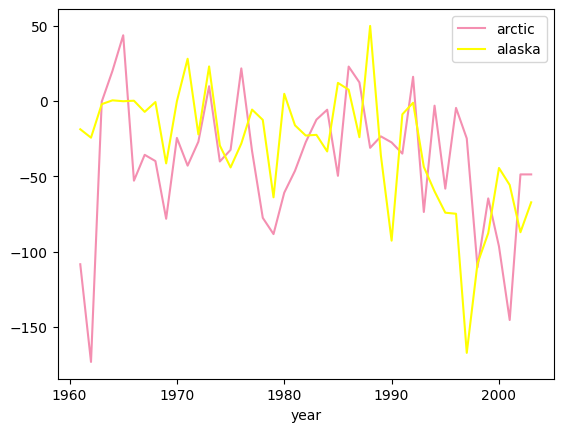

In [6]:
colors = {'arctic' : '#F48FB1',
          'alaska' : 'yellow'}

df.plot(x='year',
        y=['arctic','alaska'],
        color=colors)

Create separate plots setting the `subplots` argument to `True`:

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

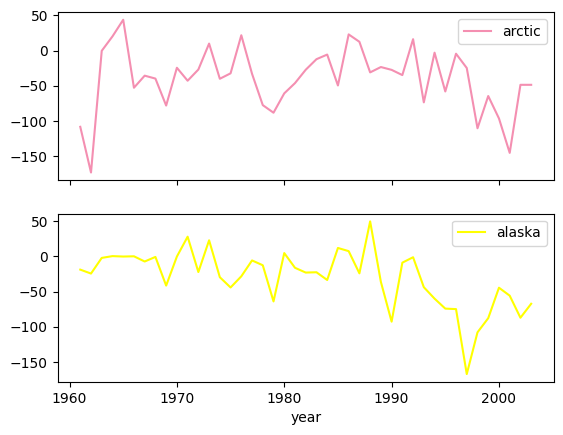

In [7]:
df.plot(x='year',
        y=['arctic','alaska'],
        color=colors,
        subplots=True)

## Check-in

(1) Plot a graph of the annual sea level rise with respect to the years


<AxesSubplot:xlabel='year'>

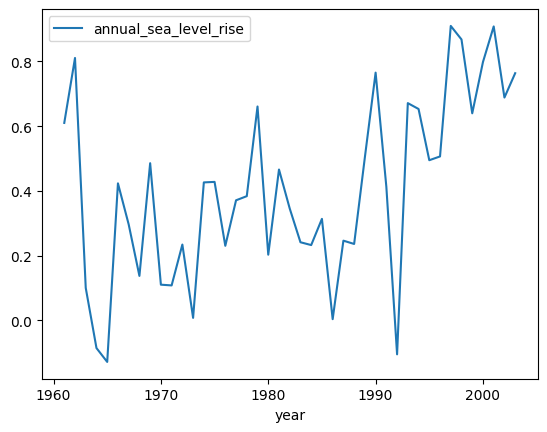

In [8]:
df.plot(x='year',
        y='annual_sea_level_rise')

(2) In the following code, what information is stored in the `columns` variable? Describe what we are plotting

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

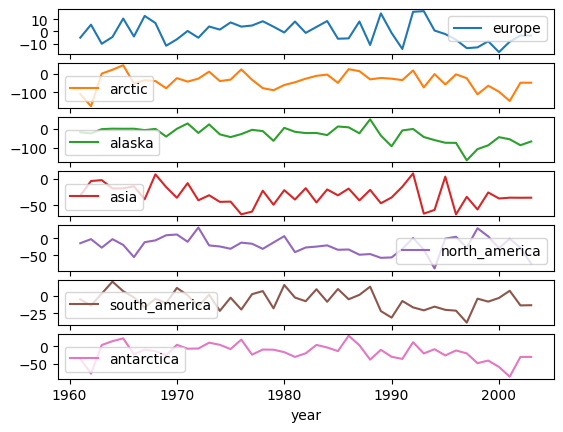

In [9]:
columns = df.loc[:,'europe':'antarctica'].columns

df.plot(x='year',
        y=columns,
        subplots=True)

In [10]:
df.loc[:,'europe':'antarctica'].columns

Index(['europe', 'arctic', 'alaska', 'asia', 'north_america', 'south_america',
       'antarctica'],
      dtype='object')

## Palmer penguins dataset

We will read the data set from the following URL: 

bit.ly/palmer-penguins-csv

In [11]:
# read in data
penguins  = pd.read_csv('https://bit.ly/palmer-penguins-csv')

# look at the head
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [12]:
# check column data types and # of non NA values in each column
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [13]:
# simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [14]:
# for categorical data and year
# count unique values
penguins[['species','island','sex','year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [15]:
# get unique values for specific columns
#unique values in species column
print(penguins.species.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [16]:
# species unique value counts
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind()` argument in `plot()`
`plot()` default = creating a line plot

`kind` = parameter of `plot()` that controls what kind of plot we get. 

Let's see the docs:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# Scatter plots
Example: visualy compare the flipper length against body mass

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

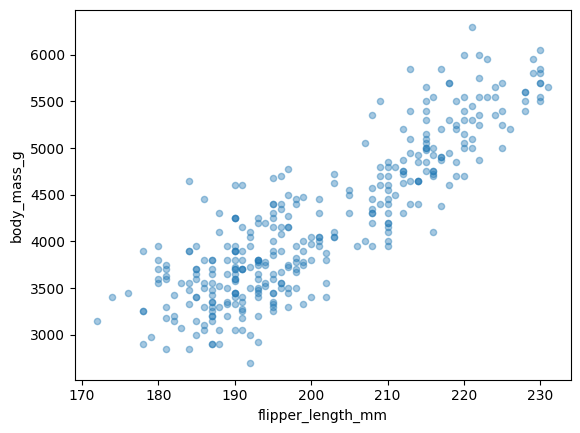

In [17]:
penguins.plot(kind='scatter',
              x='flipper_length_mm',
              y='body_mass_g',
              alpha=0.4 # controls transparency of points
             )

## Bar plot

Set `kind='bar'` in the `plot()` method.

Example: we want to get data about the 10 penguins with the lowest body mass and visualize it.

1. Find penguins with smallest body mass using `nsmallest()` method for series.

In [18]:
penguins.nsmallest(10,'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


In [19]:
smallest = penguins.body_mass_g.nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [20]:
# sort_values orders values in descending order
smallest = penguins.body_mass_g.nsmallest(10).sort_values(ascending=False)
smallest

44     3000.0
47     2975.0
104    2925.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
58     2850.0
64     2850.0
314    2700.0
Name: body_mass_g, dtype: float64

<AxesSubplot:>

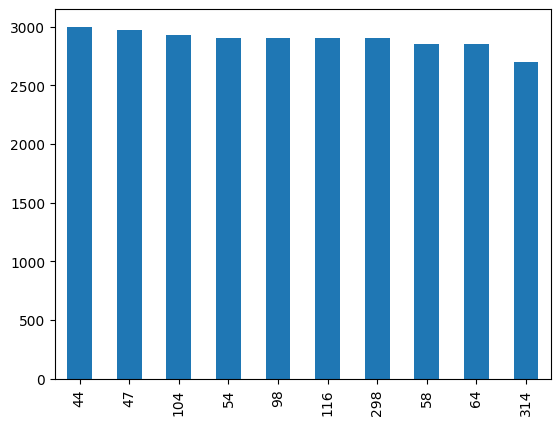

In [21]:
# plot smallest body masses as bars
smallest.plot(kind='bar')

In [22]:
# without the parentehsis = the function itself, haven't executed sort_values
type( penguins.body_mass_g.nsmallest(10).sort_values )

method

In [23]:
# with the parenthesis = the output of the function, we executed sort_values
type( penguins.body_mass_g.nsmallest(10).sort_values() )

pandas.core.series.Series

What if we wanted to look at other data for these smallest penguins?
We can use the `index` of the `smallest` series to select those rows in the original `penguins` data frame (use `loc`!)

In [24]:
penguins.loc[smallest.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008


# Histogram

To create a histogtram, set `kind='hist'` in `plot()`.

<AxesSubplot:ylabel='Frequency'>

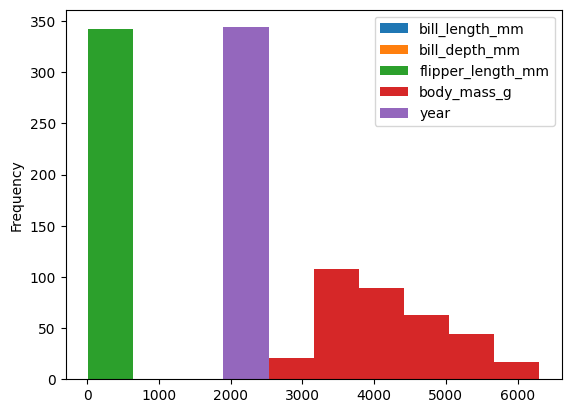

In [25]:
# using plot without subseting data - a mess again
penguins.plot(kind='hist')

<AxesSubplot:title={'center':'Penguin flipper length distribution'}, ylabel='Frequency'>

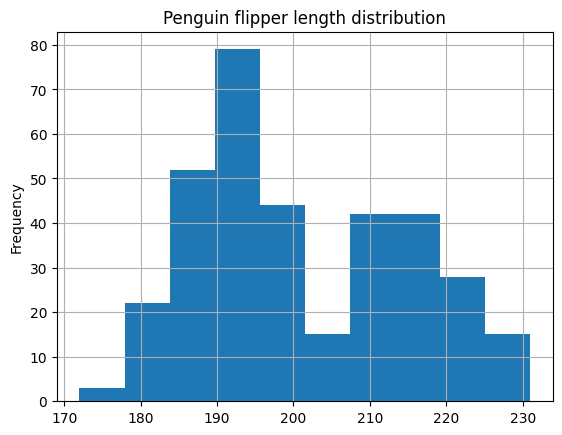

In [26]:
# distribution of flipper length measurements
# first select data, then plot
penguins.flipper_length_mm.plot(kind='hist',
                                title='Penguin flipper length distribution', 
                                xlabel='Flipper length (mm)',
                                grid=True
                               )

## Check-in 
1. Select the `bill_length_mm` and `bill_depth_mm` columns in the `penguins` dataframe and then update the `kind` parameter to `box` to make a boxplots for the bill length and bill depth.



bill_length_mm       AxesSubplot(0.125,0.11;0.352273x0.77)
bill_depth_mm     AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

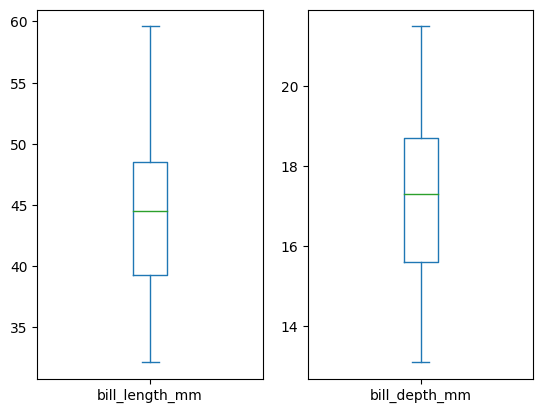

In [27]:
box_select = penguins[['bill_length_mm','bill_depth_mm']]

box_select.plot(kind = 'box',
               subplots = True)

In [28]:
print(pd.__version__)

1.3.5


2. Select both rows and columns to create a histogram of the flipper length of gentoo penguins.

<AxesSubplot:ylabel='Frequency'>

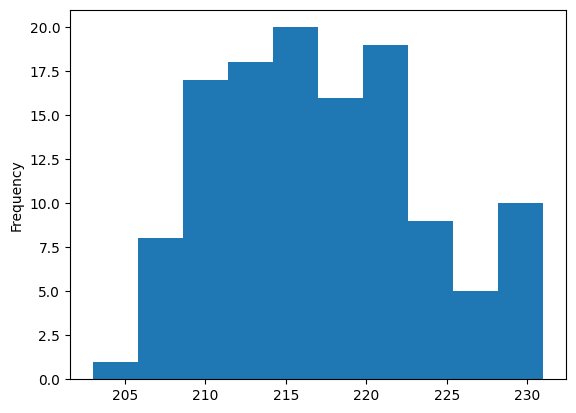

In [30]:
# select the species gentoo
gentoo = penguins.loc[penguins.species == "Gentoo", 'flipper_length_mm']

gentoo.plot(kind = 'hist')